### import necessary libraries

* cv2 ( [pypi.org](https://pypi.org/project/opencv-python) )
```
pip install opencv-python
```

* matplotlib ( [pypi.org](https://pypi.org/project/matplotlib), [matplotlib.org](https://matplotlib.org/stable/users/installing.html) )
```
pip install matplotlib
```

* PIL ( [pypi.org](https://pypi.org/project/Pillow), [pillow.readthedocs.io](https://pillow.readthedocs.io/en/stable/installation.html) )
```
pip install Pillow
```

* numpy ( [pypi.org](https://pypi.org/project/numpy), [numpy.org](https://numpy.org/install) )
```
pip install numpy
```

* skimage ( [pypi.org](https://pypi.org/project/scikit-image), [scikit-image.org](https://scikit-image.org/docs/dev/install.html) )
```
pip install -U scikit-image
```

* scipy ( [pypi.org](https://pypi.org/project/scipy), [scipy.org](https://scipy.org/install) )
```
pip install scipy
```
---
### Install all packages
```bash
python -m pip install -U --user numpy scipy matplotlib ipython jupyter pandas sympy nose opencv-python Pillow scikit-image
```

In [1]:
import cv2  

import matplotlib.image as mpimg
import matplotlib.pyplot as plt  

from PIL import Image  

import numpy as np  

from skimage.io import imshow, imread
from skimage.color import rgb2gray
from skimage import img_as_ubyte, img_as_float
from skimage.exposure import histogram, cumulative_distribution
from skimage.metrics import mean_squared_error as sk_mse
from skimage.metrics import peak_signal_noise_ratio as sk_psnr

#import scipy
from scipy.fftpack import fft, dct, ifft, idct
import itertools
from math import log10, sqrt

### function for show image 

In [2]:
def ShowImage(img, title="no title", subplot=111):
    if type(subplot)!=tuple :
        plt.subplot(subplot)
    else :
        plt.subplot(*subplot)
    plt.imshow( img, cmap='gray', vmin=0, vmax=255 )
    plt.title( title, fontweight ="bold")

### read image in 2D array

In [3]:
image = cv2.imread('2.tif', cv2.IMREAD_GRAYSCALE)

In [4]:
image.shape

(450, 450)

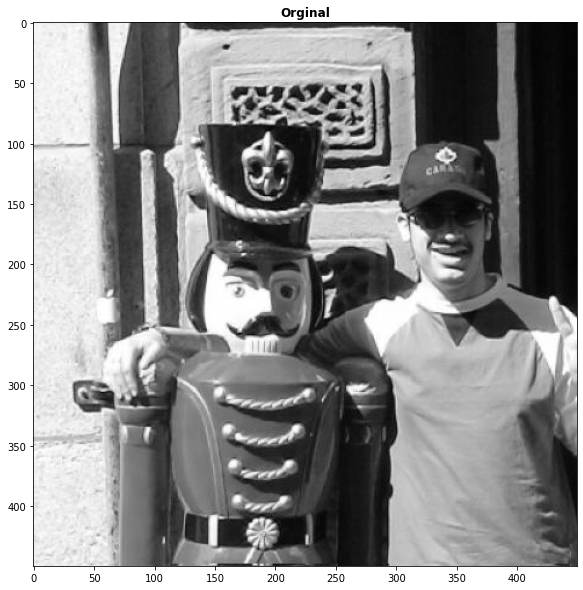

In [5]:
plt.figure(figsize=[10, 10])
ShowImage(image, "Orginal")

## Q1

<div align='right' dir="rtl" style='font-family:"B Nazanin"; font-size:20px; line-height: 200%;'><p>

تابع hist_cdf از تکلیف قبلی برای محاسبه و نمایش pdf و cdf  
اگر آرگومان returned برابر True باشد، cdf بازگردانده میشود
</p></div>

In [6]:
def hist_cdf(img, returned=False):
    hist_array, bin_array = np.histogram(img.flatten(), 256, [0, 256])

    cdf = hist_array.cumsum() / img.size
    
    if returned :
        return cdf
    
    plt.figure(figsize=[15, 5])
    
    plt.subplot(121)
    plt.xlim(min(bin_array), max(bin_array))
    plt.grid(axis='y', alpha=0.75)
    plt.xlabel('intensity levels', fontsize=20)
    plt.ylabel('frequency', fontsize=20)
    plt.title('PDF', fontsize=25)
    plt.hist(img.flatten(), 256, [0, 256], color='blue')
    #plt.bar(bin_array[:-1], hist_array, width=0.5, color='blue')

    plt.subplot(122)
    plt.xlim(min(bin_array), max(bin_array))
    plt.grid(axis='y', alpha=0.75)
    plt.xlabel('intensity levels', fontsize=20)
    plt.ylabel('cumulative probabilities', fontsize=20)
    plt.title('CDF', fontsize=25)
    plt.plot( cdf , color='red')
    #plt.bar(bin_array[:-1], cdf, width=0.5, color='red')
    
    plt.show()

<div align='right' dir="rtl" style='font-family:"B Nazanin"; font-size:20px; line-height: 200%;'><p>

تابع hist_median ابتدا بررسی میکند n بین 2 و 6 باشد  
سپس cdf تصویر مدنظر را حساب میکند  
سپس میانه هارا محاسبه میکند و ایندکس آنها را در متغیر medians میریزد  
طبق خواسته سوال باید مقدار میانگین دو بازه مجاور جایگزین شود، پس مقدار 0 و 255 را به ابتدا و انتهای لیست اضافه میکنیم و در متغییر tmp ذخیره میکنیم

سپس یک آرایه ب سایز 256 میسازیم که یک map ساده انجام میدهد و میگوییم به ازای هر مقدار، چه مقداری را جایگرین کند، برای اینکار به طول سایز اختلاف دو میانه، میانگینشان را تکرار میکنیم  

اگر پارامتر returned مقدار True داشته باشد، cdf تصویر رسم میشود
</p></div>

In [7]:
def hist_median(image, n=2, returned=False, show=True):
    assert 2<=n<=6, 'n should between 2 and 6'

    cdf = hist_cdf(image, True)
    
    medians = [ np.where( cdf>=((1/2**n)*i) )[0][0]  for i in range(1, 2**n) ]
    tmp = [0, *medians, 255 ]
    
    print(medians)
    
    vals  = [ (i+j)//2 for i,j in zip(tmp, tmp[1:]) ]
    count = [ (j-i)    for i,j in zip(tmp, tmp[1:]) ]
    count[0] += 1
    
    medianFunction = np.array(  list( itertools.chain( *[ [j]*i for i, j in zip(count, vals)] ) ) , 
         dtype=np.uint8)
    
    medianedImg = medianFunction[image]
    
    if show:
        hist_cdf( medianedImg )
    
    if returned:
        return medianedImg

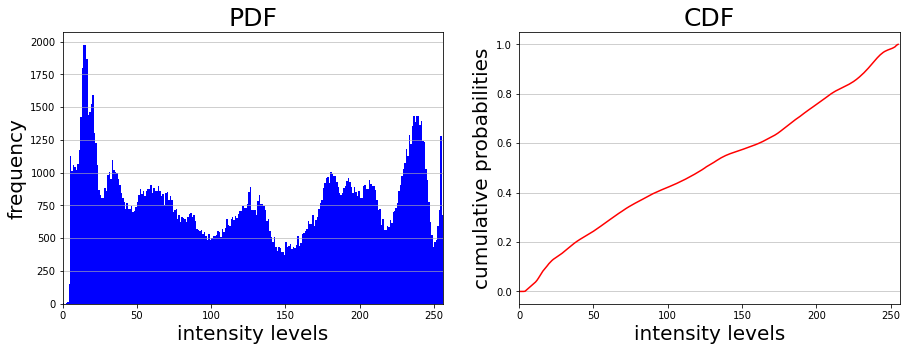

In [8]:
hist_cdf(image)

[52, 125, 199]


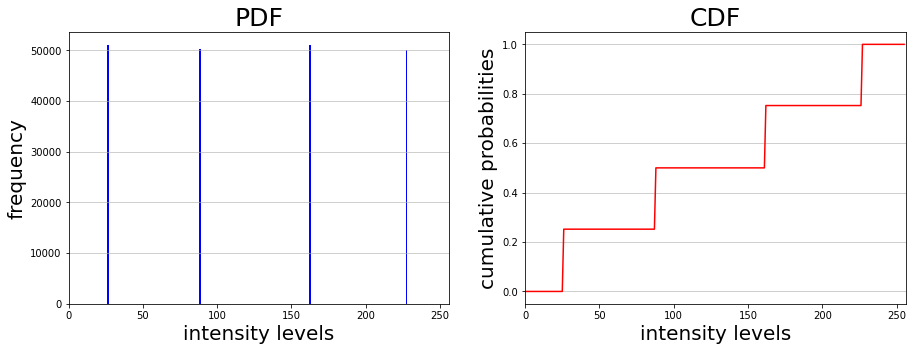

In [9]:
medianedImg = hist_median(image, 2, True)

In [10]:
simpleQuantizationImg = (image//64)*64

<div align='right' dir="rtl" style='font-family:"B Nazanin"; font-size:20px; line-height: 200%;'><p>

همانطور که مشاهده میشود simpleQuantizationImg تیره تر است نسبت به کوانتزیناسیون به روش میانه و منطقی نیز هست (برای مثال اعداد بین 0 تا 63 مقدار 0 اتخاذ میکنند)  
</p></div>

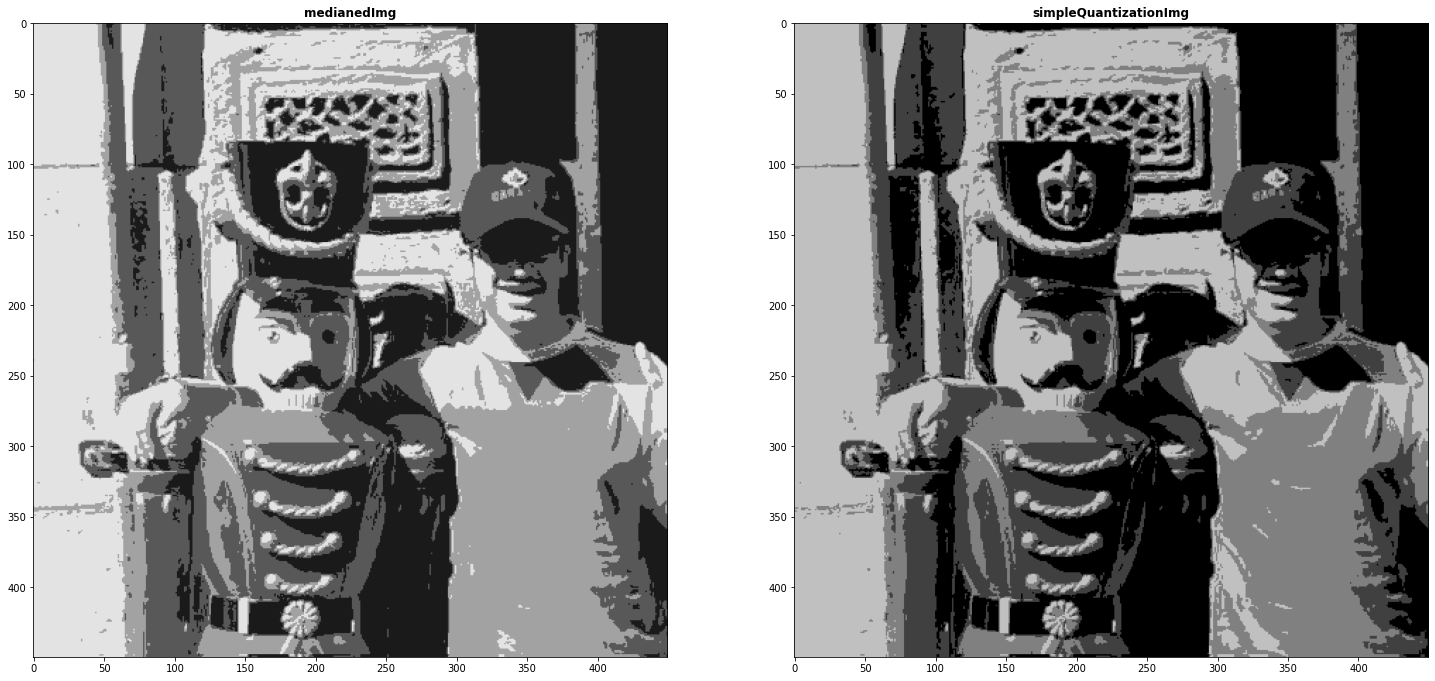

In [11]:
plt.figure(figsize=[25, 25])
ShowImage(medianedImg, "medianedImg", 121)
ShowImage(simpleQuantizationImg, "simpleQuantizationImg", 122)

## Q2

### Useful links
+ https://inst.eecs.berkeley.edu/~ee123/sp16/Sections/JPEG_DCT_Demo.html

### Define 2D DCT and IDCT

In [12]:
# implement 2D DCT
def dct2(block):
    return dct(dct( block.T, norm = 'ortho').T, norm = 'ortho')
    return dct(dct( block, axis=0, norm='ortho' ), axis=1, norm='ortho' )

# implement 2D IDCT
def idct2(block):
    return idct(idct( block.T, norm = 'ortho').T, norm = 'ortho')
    return idct(idct( block, axis=0 , norm='ortho'), axis=1 , norm='ortho')

<div align='right' dir="rtl" style='font-family:"B Nazanin"; font-size:20px; line-height: 200%;'><p>

تابعی جهت تغییر سایز تصویر

</p></div>

In [13]:
def imresize(Input_image, dim , interpolation=cv2.INTER_LINEAR):
    return cv2.resize(Input_image, dim[::-1] , interpolation=interpolation)

<div align='right' dir="rtl" style='font-family:"B Nazanin"; font-size:20px; line-height: 200%;'><p>

تابعی جهت محاسبه PSNR
</p></div>

In [14]:
def my_PSNR(original, compressed):
    mse = np.mean((original - compressed) ** 2)
    if(mse == 0):  # MSE is zero means no noise is present in the signal .
                  # Therefore PSNR have no importance.
        return 100
    max_pixel = 255.0
    psnr = 20 * log10(max_pixel / sqrt(mse))
    return psnr

<div align='right' dir="rtl" style='font-family:"B Nazanin"; font-size:20px; line-height: 200%;'><p>

تابع HW3_dct  
پارامتر I تصویر مورد نظر  
پارامتر K سایز بلوک های dct  
پارامتر t مقدار ترشهولد ما(ضرایب با مقدار کمتر، صفر میشوند)  
---
ابتدا بررسی میشود پارامتر K مقدار بین 4 تا 32 داشته باشد  
سپس درصورت نیاز padding صورت میگیرد  
در ادامه با ایتریشن های K*K روی ماتریس dct2 را اعمال میکنیم  
و ضرایب کوچکتر از ترشهولد را برابر صفر قرار میدهیم  

در ادامه عملیات معکوس را انجام داده و تصویر را از حالت فشرده خارج میکنیم با استفاده از تابع idct2 و ایتریشن روی بلوک های K*K  

سپس تصویر اصلی و تصویر بعد از عملیات مدنظر نمایش داده میشود  
در ادامه PSNR دو تصویر محاسبه و نمایش داده میشود  
در انتها هم اختلاف دو تصویر نمایش داده میشود  

</p></div>

In [15]:
def HW3_dct(I, K, t):
    assert 4<=K<=32, 'K should between 4 and 32'
    
    Height, Width = I.shape
    
    Xpad = K-Height%K if Height%K else 0
    Ypad = K-Width%K if Width%K else 0
    new_shape = (Height+Xpad, Width+Ypad)
    
    J = imresize(I, new_shape, cv2.INTER_CUBIC ) if (Xpad+Ypad) else I
    
    # Perform a blockwise DCT
    img_dct = np.zeros(new_shape)
    
    # Do KxK DCT on image (in-place)
    for i in range(0, Height+Xpad, K):
        for j in range(0, Width+Ypad, K):
            img_dct[i:(i+K),j:(j+K)] = dct2( J[i:(i+K),j:(j+K)] )
            
    # Apply threshholding                     t = 0.012*np.max(img_dct)
    img_dct_thresh = img_dct * ( np.abs(img_dct) > t)
    
    percent_nonzeros = np.sum( img_dct_thresh != 0.0 ) / (new_shape[0]*new_shape[1]*1.0)
    print(f"Keeping only {percent_nonzeros*100.0} of the DCT coefficients")
    
    ########################################################
    
    img_idct = np.zeros(new_shape)

    for i in range(0, Height+Xpad, K):
        for j in range(0, Width+Ypad, K):
            img_idct[i:(i+K),j:(j+K)] = idct2( img_dct_thresh[i:(i+K),j:(j+K)] )
    
    # Comparison between original and DCT compressed images
    plt.figure(figsize=[25, 25])
    ShowImage(J, "Orginal image", 121)
    ShowImage(img_idct, "DCT compressed image", 122)
    
    #print(f"PSNR = { cv2.PSNR(J, img_idct) }")
    #print(f"PSNR = { sk_psnr(J, img_idct) }")
    print(f"PSNR = { my_PSNR(J, img_idct) }")
    
    
    img_diff = np.abs(J-img_idct)
    
    plt.figure(figsize=[25, 25])
    plt.imshow( img_diff, cmap='gray', vmax=np.max(img_diff), vmin = np.min(img_diff))
    plt.title( "image diffrence")

Keeping only 8.26696675900277 of the DCT coefficients
PSNR = 33.746824033334676


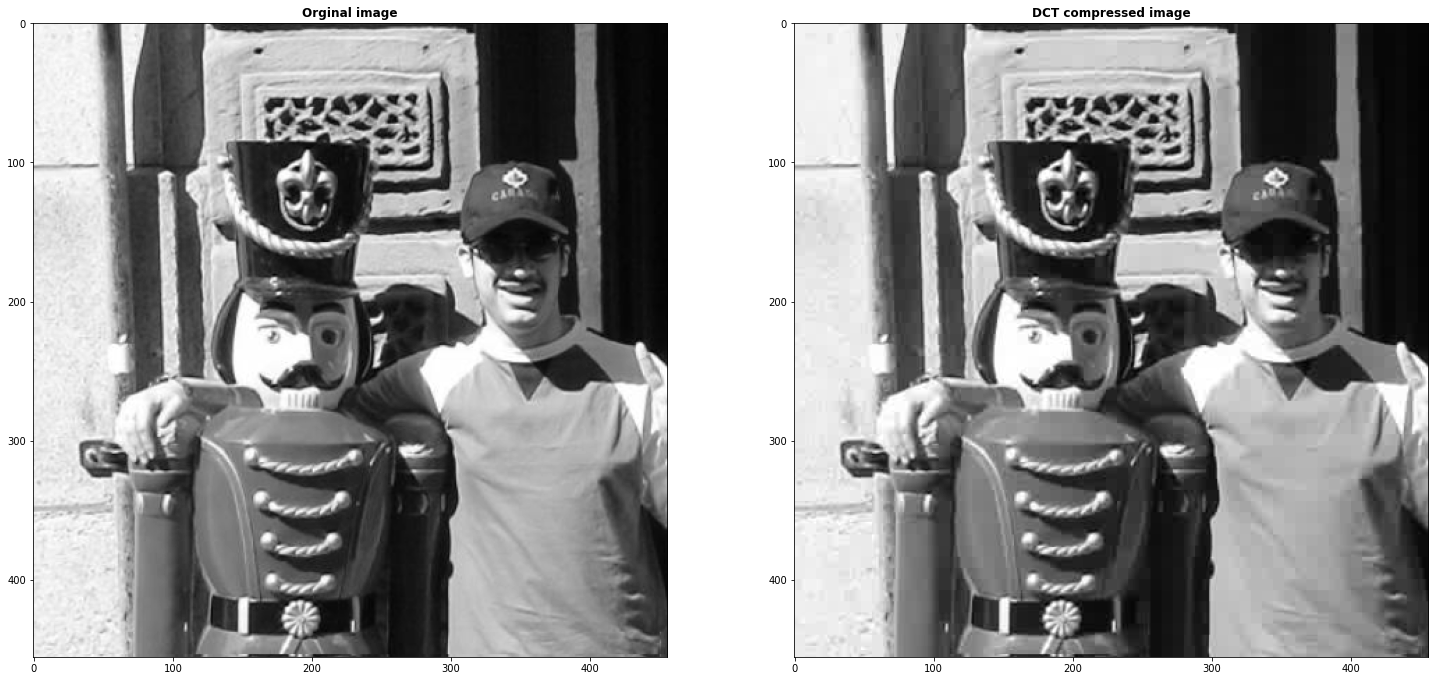

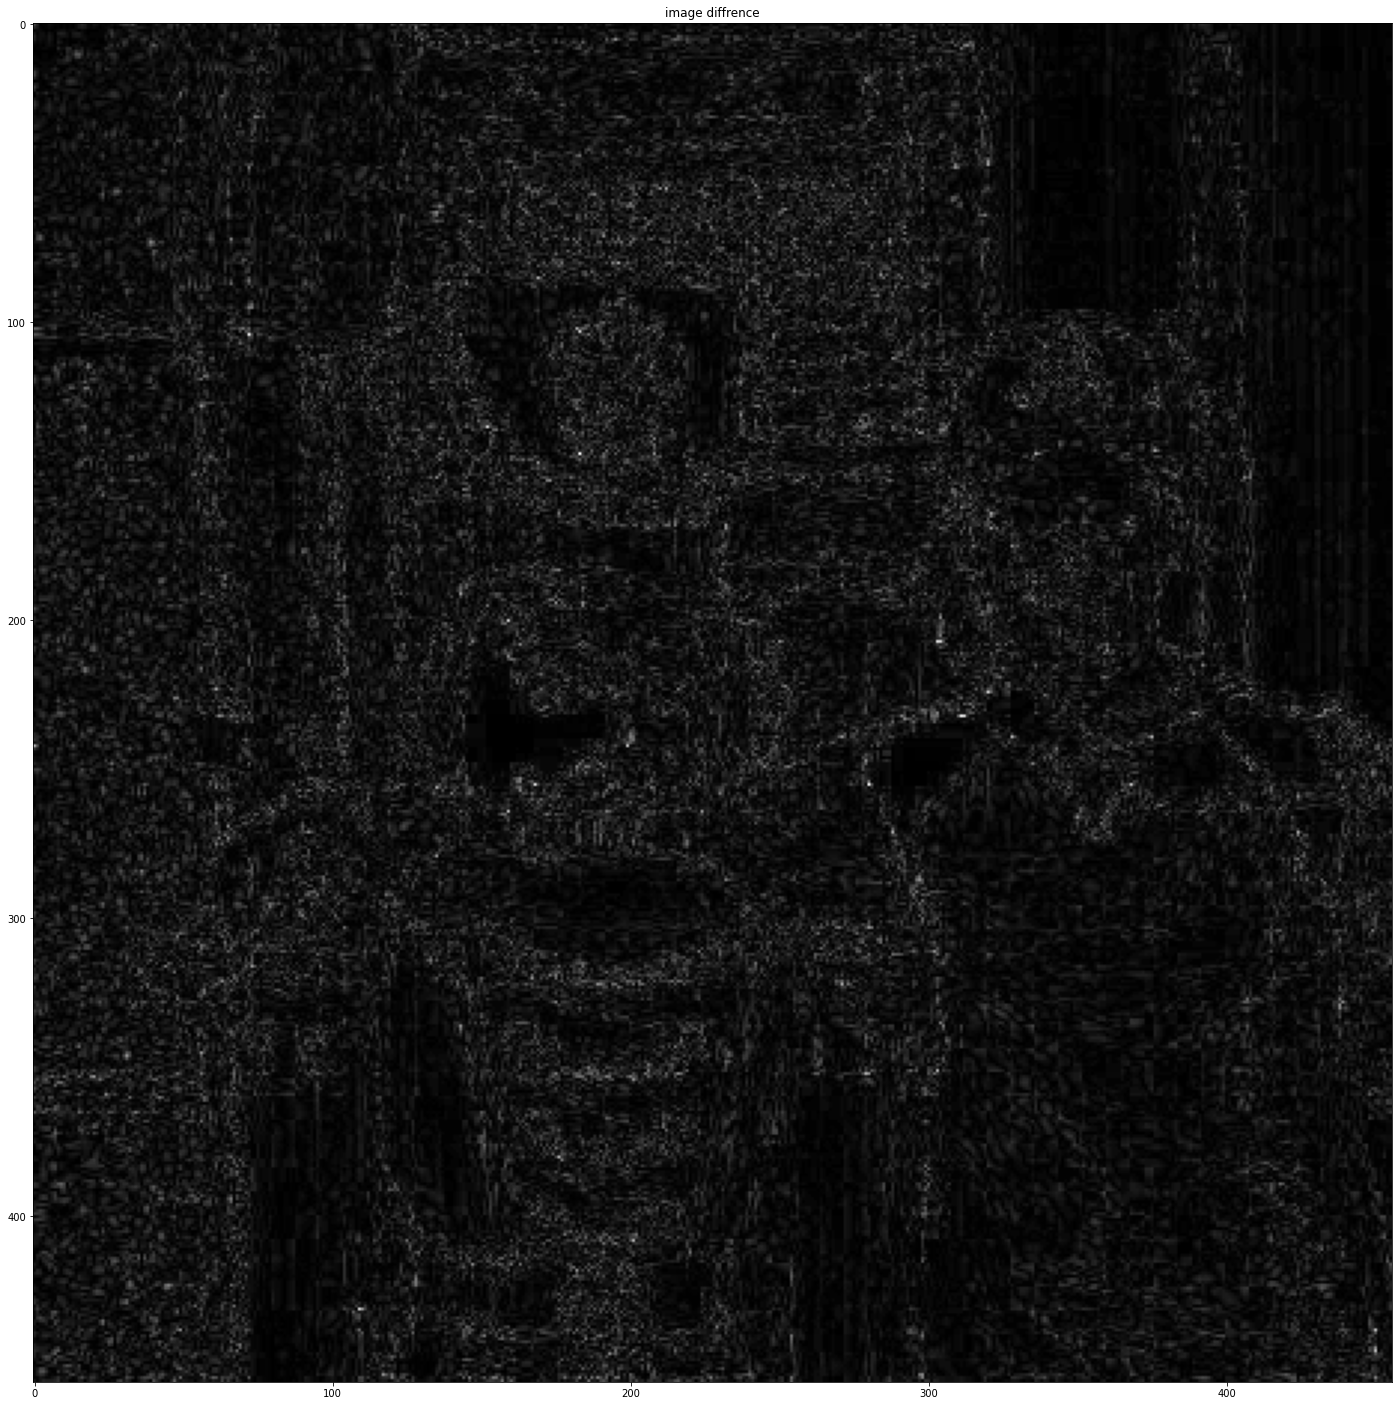

In [16]:
HW3_dct(image, 8, 24)